In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Point, Segment
from scipy.spatial import distance
import math

### Reference sample for trace 1 + more traces

In [6]:
ref1 = pd.read_csv('data/feri_logy_analyza/200629_karting/kartfinal36pr3r.csv', header=None, sep=';')

In [7]:
ref1 = ref1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [8]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,480492143,175678361,69136003,532496037,119322,108,21910375,141,5
1,480492134,175678352,69135997,532496027,119324,103,21570312,141,6
2,480492127,175678343,69135990,532496019,119315,111,21556731,141,8
3,480492119,175678334,69135984,532496010,119315,112,21661797,141,9
4,480492111,175678325,69135977,532496001,119313,105,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,480492388,175678675,69136228,532496318,119330,97,21431455,141,1
1417,480492381,175678669,69136224,532496310,119324,84,21663436,141,1
1418,480492376,175678662,69136219,532496304,119318,81,21529932,141,1
1419,480492371,175678657,69136215,532496298,119321,80,21579600,141,1


In [9]:
traces1 = pd.read_csv('data/feri_logy_analyza/200629_karting/200629130554_gps.log', header=None, sep=';')

In [10]:
traces1 = traces1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

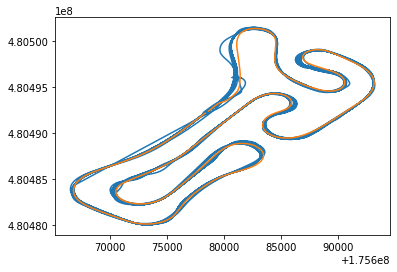

In [11]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

### Reference sample for trace 2 + more traces

In [12]:
ref2 = pd.read_csv('data/200623_academy/trasa23.csv', header=None, sep=';')
ref2 = ref2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [13]:
traces2 = pd.read_csv('data/200623_academy/200623111152_gps.log', header=None, sep=';')
traces2 = traces2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

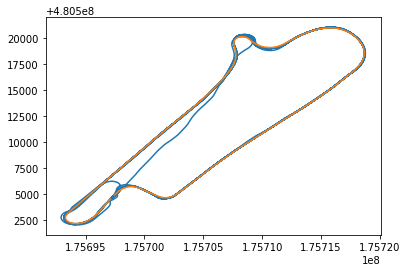

In [14]:
fig2 = plt.figure()
for frame in [traces2, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

In [15]:
traces3 = pd.read_csv('data/200623_academy/200623121213_gps.log', header=None, sep=';')
traces3 = traces3.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces3.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

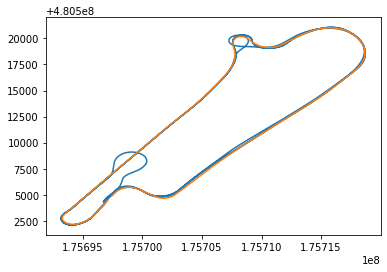

In [16]:
fig3 = plt.figure()
for frame in [traces3, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

### Data normalization

In [17]:
# divide lat and lon by 10 000 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['LAT'] = frame['LAT'].apply(lambda x: x * 0.0000001)
    frame['LON'] = frame['LON'].apply(lambda x: x * 0.0000001)

In [18]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,108,21910375,141,5
1,48.049213,17.567835,69135997,532496027,119324,103,21570312,141,6
2,48.049213,17.567834,69135990,532496019,119315,111,21556731,141,8
3,48.049212,17.567833,69135984,532496010,119315,112,21661797,141,9
4,48.049211,17.567832,69135977,532496001,119313,105,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,97,21431455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,84,21663436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,81,21529932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,80,21579600,141,1


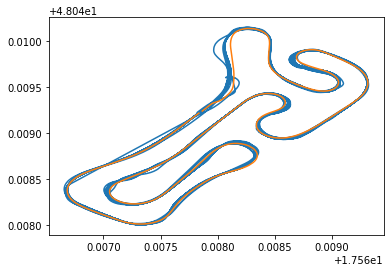

In [19]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

OK, so far so good

In [20]:
# divide gspeed by 100 (cm/s -> m/s)
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['GSPEED'] = frame['GSPEED'].apply(lambda x: x * 0.01)

In [21]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,1.08,21910375,141,5
1,48.049213,17.567835,69135997,532496027,119324,1.03,21570312,141,6
2,48.049213,17.567834,69135990,532496019,119315,1.11,21556731,141,8
3,48.049212,17.567833,69135984,532496010,119315,1.12,21661797,141,9
4,48.049211,17.567832,69135977,532496001,119313,1.05,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,0.97,21431455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,0.84,21663436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,0.81,21529932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,0.80,21579600,141,1


In [22]:
# divide crs by 100 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['CRS'] = frame['CRS'].apply(lambda x: x * 0.00001)

In [23]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,1.08,219.10375,141,5
1,48.049213,17.567835,69135997,532496027,119324,1.03,215.70312,141,6
2,48.049213,17.567834,69135990,532496019,119315,1.11,215.56731,141,8
3,48.049212,17.567833,69135984,532496010,119315,1.12,216.61797,141,9
4,48.049211,17.567832,69135977,532496001,119313,1.05,217.01829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,0.97,214.31455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,0.84,216.63436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,0.81,215.29932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,0.80,215.79600,141,1


In [24]:
# drop unnecessary columns
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'], inplace=True)

In [25]:
ref1

,LAT,LON,GSPEED,CRS
0,48.049214,17.567836,1.08,219.10375
1,48.049213,17.567835,1.03,215.70312
2,48.049213,17.567834,1.11,215.56731
3,48.049212,17.567833,1.12,216.61797
4,48.049211,17.567832,1.05,217.01829
...,...,...,...,...
1416,48.049239,17.567867,0.97,214.31455
1417,48.049238,17.567867,0.84,216.63436
1418,48.049238,17.567866,0.81,215.29932
1419,48.049237,17.567866,0.80,215.79600


In [26]:
print('ref1 count of rows: {}'.format(ref1.shape[0]))
print('traces1 count of rows: {}'.format(traces1.shape[0]))
print('ref2 count of rows: {}'.format(ref2.shape[0]))
print('traces2 count of rows: {}'.format(traces2.shape[0]))
print('traces3 count of rows: {}'.format(traces3.shape[0]))

ref1 count of rows: 1421
traces1 count of rows: 51099
ref2 count of rows: 998
traces2 count of rows: 29496
traces3 count of rows: 5689


In [27]:
# remove parts where the LAT and LON are not changing
# the car was either extremely slow in those cases or still and the system kept measuring  
for frame in [ref1, traces1, ref2, traces2, traces3]:
    last_lat = None
    last_lon = None
    dropped_rows = list()

    for index, row in frame.iterrows():   
        if row['LAT'] == last_lat and row['LON'] == last_lon:
            dropped_rows.append(index)
            frame.drop(index, inplace=True)
        else:
            last_lat = row['LAT']
            last_lon = row['LON']
            
    print('Dropped {} rows'.format(len(dropped_rows)))

Dropped 0 rows
Dropped 14083 rows
Dropped 0 rows
Dropped 8058 rows
Dropped 1100 rows


In [28]:
print('ref1 count of rows: {}'.format(ref1.shape[0]))
print('traces1 count of rows: {}'.format(traces1.shape[0]))
print('ref2 count of rows: {}'.format(ref2.shape[0]))
print('traces2 count of rows: {}'.format(traces2.shape[0]))
print('traces3 count of rows: {}'.format(traces3.shape[0]))

ref1 count of rows: 1421
traces1 count of rows: 37016
ref2 count of rows: 998
traces2 count of rows: 21438
traces3 count of rows: 4589


In [29]:
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame.reset_index(drop=True, inplace=True)

In [30]:
# create columns for lat and lon af the next position and add the to the dataframe 
for frame in [ref1, traces1, ref2, traces2, traces3]:
    next_lat = frame['LAT']
    next_lat = next_lat.append(pd.Series([np.nan]), ignore_index=True)
    next_lat = next_lat.iloc[1:]
    next_lat = next_lat.reset_index(drop=True)
    
    next_lon = frame['LON']
    next_lon = next_lon.append(pd.Series([np.nan]), ignore_index=True)
    next_lon = next_lon.iloc[1:]
    next_lon = next_lon.reset_index(drop=True)
    
    frame['NLAT'] = next_lat
    frame['NLON'] = next_lon

In [31]:
# drop the last rows which contain NaN
ref1 = ref1.dropna()
traces1 = traces1.dropna()
ref2 = ref2.dropna()
traces2 = traces2.dropna()
traces3 = traces3.dropna()

In [32]:
ref1

,LAT,LON,GSPEED,CRS,NLAT,NLON
0,48.049214,17.567836,1.08,219.10375,48.049213,17.567835
1,48.049213,17.567835,1.03,215.70312,48.049213,17.567834
2,48.049213,17.567834,1.11,215.56731,48.049212,17.567833
3,48.049212,17.567833,1.12,216.61797,48.049211,17.567832
4,48.049211,17.567832,1.05,217.01829,48.049210,17.567832
...,...,...,...,...,...,...
1415,48.049239,17.567868,0.95,211.98998,48.049239,17.567867
1416,48.049239,17.567867,0.97,214.31455,48.049238,17.567867
1417,48.049238,17.567867,0.84,216.63436,48.049238,17.567866
1418,48.049238,17.567866,0.81,215.29932,48.049237,17.567866


Still seems just fine

In [33]:
# # now it's good time to merge traces2 and traces3
# # probably it's better idea not to merge them
# traces2 = pd.concat([traces2, traces3])
# traces2 = traces2.reset_index(drop=True)

# traces2

In [34]:
# save normalized data
ref1.to_csv('data/ref1.csv', index=False)
traces1.to_csv('data/traces1.csv', index=False)
ref2.to_csv('data/ref2.csv', index=False)
traces2.to_csv('data/traces2-1.csv', index=False)
traces3.to_csv('data/traces2-2.csv', index=False)

In [35]:
def separate_laps(ref, traces, traces_id):
    points = list()
    
    for i in range(len(traces)):
        points.append([traces['LON'][i], traces['LAT'][i]])

    # use last points to determine normal vector
    last_point1 = [ref['LON'].iloc[-1], ref['LAT'].iloc[-1]]
    last_point2 = [ref['LON'].iloc[-2], ref['LAT'].iloc[-2]]

    a = last_point2[0] - last_point1[0]
    b = last_point2[1] - last_point1[1]

    dst = distance.euclidean(last_point1, last_point2)
    distance_multiplier = math.ceil(0.0001 / (2 * dst))

    a = last_point1[0] - last_point2[0]
    b = last_point1[1] - last_point2[1]
    
    v = np.array([a, b])
    v_normal = np.array([-b, a])
    start_point = np.array(last_point2)

    point_top = Point(start_point + distance_multiplier * v_normal, evaluate=False)
    point_bottom = Point(start_point - distance_multiplier * v_normal, evaluate=False)
    start_line = Segment(point_top, point_bottom, evaluate=False)
    
    laps = [0]

    for i in range(len(points) - 1):
        point1 = Point(points[i][0], points[i][1], evaluate=False)
        point2 = Point(points[i + 1][0], points[i + 1][1], evaluate=False)

        if point1 == point2:
            continue

        # "usecka" between point1 and point2
        segment = Segment(point1, point2, evaluate=False)
        intersection = segment.intersection(start_line)

        # add start of a new lap
        if intersection:
            laps.append(i + 1)
            print('Lap ending at index: {}'.format(i))
            
    # save the circuits (laps)
    for i in range(len(laps) - 1):
        lap_df = traces.iloc[laps[i] : laps[i + 1]]
        lap_df.to_csv('data/laps/lap{}-{}.csv'.format(traces_id, i), index=False)

    # tha last circuit (lap) was not saved yet so save that one
    lap_df = traces.iloc[laps[-1]:]
    lap_df.to_csv('data/laps/lap{}-{}.csv'.format(traces_id, len(laps) - 1), index=False)
            
#     # draw laps     
#     laps_pairs = list()
#     for i in range(0, len(laps) - 1):
#         laps_pairs.append([laps[i], laps[i + 1]])

#     print(laps_pairs)

#     fig, axes = plt.subplots(nrows=len(laps_pairs)//2,ncols=2)
#     fig.set_size_inches(20, 50)

#     for i, ax in enumerate(axes.flatten()):
#         ax.plot(traces['LON'][laps_pairs[i][0]:laps_pairs[i][1]], traces['LAT'][laps_pairs[i][0]:laps_pairs[i][1]])    

In [36]:
# i = 3
# lap_df = traces3.iloc[laps[i] : laps[i + 1]]
# fig = plt.figure(figsize=(14, 10))
# plt.plot(ref2['LON'], ref2['LAT'])
# plt.plot(lap_df['LON'], lap_df['LAT'])
# plt.plot([point_top[0], point_bottom[0]], [point_top[1], point_bottom[1]])

In [37]:
separate_laps(ref1, traces1, 1)

Lap ending at index: 2302
Lap ending at index: 3603
Lap ending at index: 5974
Lap ending at index: 7470
Lap ending at index: 8825
Lap ending at index: 10010
Lap ending at index: 11240
Lap ending at index: 12464
Lap ending at index: 13706
Lap ending at index: 15025
Lap ending at index: 16286
Lap ending at index: 17483
Lap ending at index: 18521
Lap ending at index: 18827
Lap ending at index: 19050
Lap ending at index: 20032
Lap ending at index: 21080
Lap ending at index: 22081
Lap ending at index: 23072
Lap ending at index: 24160
Lap ending at index: 25234
Lap ending at index: 26332
Lap ending at index: 27353
Lap ending at index: 28454
Lap ending at index: 29411
Lap ending at index: 30360
Lap ending at index: 30916
Lap ending at index: 32132
Lap ending at index: 33112
Lap ending at index: 34150
Lap ending at index: 35193
Lap ending at index: 36146
Lap ending at index: 36869


In [38]:
separate_laps(ref2, traces2, 2)

Lap ending at index: 1127
Lap ending at index: 2828
Lap ending at index: 4031
Lap ending at index: 5360
Lap ending at index: 6664
Lap ending at index: 8193
Lap ending at index: 9556
Lap ending at index: 10797
Lap ending at index: 12094
Lap ending at index: 13323
Lap ending at index: 14783
Lap ending at index: 16308
Lap ending at index: 17483
Lap ending at index: 18591
Lap ending at index: 19402
Lap ending at index: 21056


In [39]:
separate_laps(ref2, traces3, 3)

Lap ending at index: 1226
Lap ending at index: 2332
Lap ending at index: 3594
Lap ending at index: 4520
